In [1]:


from pcpptc import PolygonInstance
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver import (
    FractionalGridSolver,
)
from pcpptc.grid_solver.grid_instance import VertexPassage
from pcpptc.grid_solver.grid_solution import FractionalSolution
from pcpptc.grid_solver.grid_solution.coverage_analysis import (
    compute_coverage_polygon_of_grid,
)
from pcpptc.instance_converter import RotatingRegularSquare, RotatingRegularHexagonal
from pcpptc.instance_converter.dmsh import DmshGrid
import numpy as np
from pcpptc.plot import setup_plot, plot_polygon_instance
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

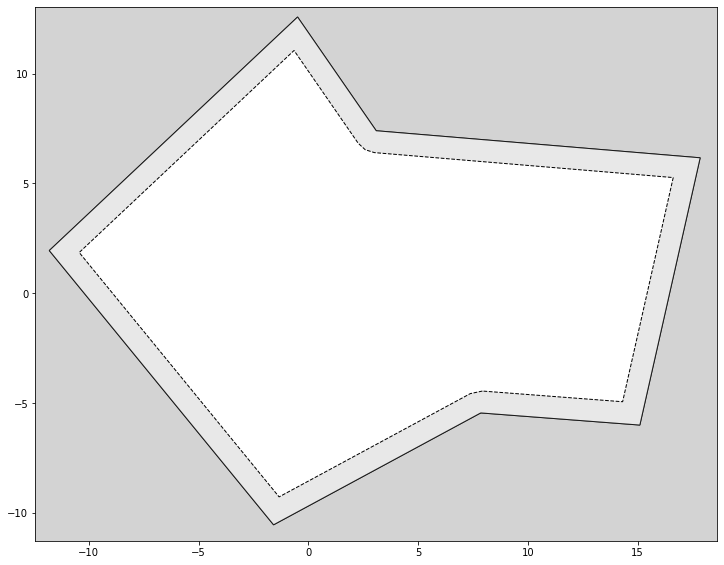

In [2]:
from pcpptc.plot.intermediate import (
    plot_graph,
    plot_points,
    plot_fractional_solution,
    plot_turn,
)

pi = PolygonInstance.from_json(file_path="./01c_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
plt.show()
pi.expensive_areas = []

In [3]:
figsize = (3.5, 3.5)

In [4]:
t = DmshGrid(full_coverage=True, point_based=True, buffer=0.1, simplification=0.1)
gi3 = t(pi)

<Figure size 432x288 with 0 Axes>

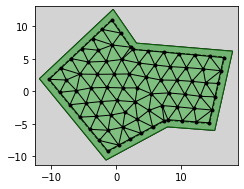

In [5]:
ax = setup_plot(figsize=figsize)
# ax = setup_plot()
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="black", edge_color="black")
plt.tight_layout()
plt.show()

Academic license - for non-commercial use only - expires 2021-09-25
Using license file /home/ANONYMOUS_USER/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 274 rows, 1246 columns and 3346 nonzeros
Model fingerprint: 0x1759e4a0
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+00, 6e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 274 rows, 1246 columns, 3346 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   7.800000e+01   0.000000e+00      0s
     279    2.0796692e+02   0.000000e+00   0.000000e+00      0s

Solved in 279 iterations and 0.02 seconds
Optimal objective  2.079669152e+02
Adding VertexPassage(PointVertex[140320676721808]@(-8.672899097928592, -0.1480735350350233)<- PointVertex[140320680472976]@(-10.30032179019641, 1.841864

<Figure size 432x288 with 0 Axes>

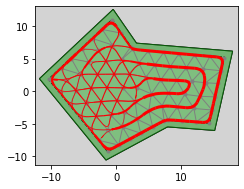

In [6]:
from pcpptc.grid_solver.cycle_cover.fractional_grid_solver.integralizer import (
    IntegralizingFractionalSolver,
)

fs = IntegralizingFractionalSolver()(gi3, 40)
ax = setup_plot(figsize=figsize)
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="grey", edge_color="grey")
plot_fractional_solution(ax, fs, color="red", linewidth=3.0, zorder=3)
plt.tight_layout()
plt.show()

In [7]:
from pcpptc.grid_solver.cycle_cover.atomic_strip_orientation import (
    EquiangularRepetitionAtomicStrips,
)

Solve matching on 28614 edges.


<Figure size 432x288 with 0 Axes>

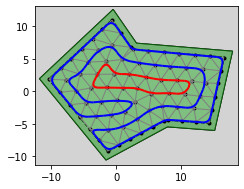

In [8]:
from pcpptc.grid_solver.cycle_connecting import connect_cycles_via_pcst
from pcpptc.grid_solver.cycle_cover.atomic_strip_matcher import (
    AtomicStripMatching,
    TransitionCostCalculator,
)
from pcpptc.plot import plot_solution
from pcpptc.grid_solver.grid_solution import create_cycle_solution

strip_alg = EquiangularRepetitionAtomicStrips(3, 2)
atomic_strips = strip_alg(gi3, fs)
asm = AtomicStripMatching(gi3.graph, TransitionCostCalculator(gi3.touring_costs))
for p in gi3.graph.nodes:
    for o in atomic_strips[p]:
        s = asm.create_atomic_strip(p, o.orientation)
        if o.is_skippable():
            asm.add_skip_penalty(s, o.penalty)
edges = asm.solve()
solution = asm.to_solution()
cc = create_cycle_solution(gi3.graph, solution)
ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="black", edge_color="grey")
plot_solution(ax, cc[0].waypoints(), "blue", w=2)
plot_solution(ax, cc[1].waypoints(), "red", w=2)
assert len(cc) == 2
plt.tight_layout()
plt.show()

Connecting 2 cycles
Trying to connect greedily
2 cycles remaining
Computing PCST
Connecting PCST via DFS


<Figure size 432x288 with 0 Axes>

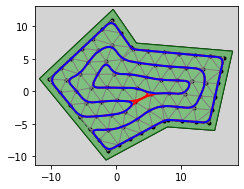

In [12]:
tour = connect_cycles_via_pcst(gi3, cc)

ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="black", edge_color="grey")
plot_solution(ax, tour.waypoints(), "red", w=2)
plot_solution(ax, cc[0].waypoints(), "blue", w=2)
plot_solution(ax, cc[1].waypoints(), "blue", w=2)
plt.tight_layout()
plt.savefig("07b_connecting.pdf")
plt.show()